In [1]:
from benchmarking.analysis.analyze_results import *

In [2]:
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking-raw/referenced-experiments/0701-benchmark_dataset")

In [3]:
group_by_dataset=["dataset", "pool_size"]

In [4]:
df_datasets = []
for i in range(1, 11):
    df_dataset = extract_pandas(output_base_folder, folder_filter=f"run_{i}/*dataset*")
    df_datasets.append(df_dataset)
    print(df_dataset.groupby(group_by_dataset).groups.keys())
    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1210/1210 [00:01<00:00, 829.16it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1238/1238 [00:01<00:00, 873.51it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1254/1254 [00:01<00:00, 886.56it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1365/1365 [00:01<00:00, 1017.36it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1281/1281 [00:01<00:00, 811.63it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1264/1264 [00:01<00:00, 856.44it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1277/1277 [00:01<00:00, 837.97it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1287/1287 [00:01<00:00, 870.32it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1257/1257 [00:01<00:00, 792.13it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1266/1266 [00:01<00:00, 672.91it/s]


dict_keys([('s3', 1), ('s3', 2), ('s3', 3), ('s3', 4), ('s3', 5), ('s3', 6), ('s3', 7), ('s3', 10), ('s3', 15), ('s3', 20), ('s3', 30), ('s3', 40), ('s3', 50), ('s3', 60), ('s3', 80)])


In [5]:
print(len(df_datasets))

10


In [6]:
def plot_throughput_per_storage2(dfs, dataset, group_by: List[str], request_time=True):
#     fig, ax1 = plt.subplots(figsize=(15, 7))
    fig, ax1 = plt.subplots()
    for df in dfs:
        collected = {}

        x_label = group_by[1]

        df_for_function_name = df[df["function_name"] == "__getitem__"].drop_duplicates(subset=['time_start', 'time_end'], keep="first", inplace=False) 
        df_for_function_name["request_time"] = df_for_function_name["time_end"] - df_for_function_name["time_start"]
        nodes = set(df_for_function_name["node"].drop_duplicates().tolist())
        df_grouped_by_run = df_for_function_name.groupby(["run"]).agg(
            {"time_start": "min", "time_end": "max", "len": "sum", **{k: "first" for k in group_by}}
        )
        df_grouped_by_run["runtime"] = df_grouped_by_run["time_end"] - df_grouped_by_run["time_start"]
        df_grouped_by_run["throughput [Mbit/s]"] = (df_grouped_by_run["len"] / df_grouped_by_run["runtime"] / (1024 * 1024)) * 8
        # sum of all runtimes and all downloaded data by summer over runs
        df_aggregated_over_runs = df_grouped_by_run.groupby(group_by).agg(
            **{
                "len": ("len", "sum"),
                "runtime": ("runtime", "sum"),
                "min_throughput": ("throughput [Mbit/s]", "min"),
                "max_throughput": ("throughput [Mbit/s]", "max"),
                **{k: (k, "first") for k in group_by},
            }
        )

        # https://en.wikipedia.org/wiki/Data-rate_units#Megabit_per_second
        df_aggregated_over_runs["throughput [Mbit/s]"] = (
            (df_aggregated_over_runs["len"] / df_aggregated_over_runs["runtime"] / (1024 * 1024)) * 8
        )
        df_aggregated_over_runs["min_throughput"] = df_aggregated_over_runs["min_throughput"]

        # all requests from all data
        df_aggregated_over_requests = df_for_function_name.groupby(group_by).agg(
            **{
                "min_request_time": ("request_time", "min"),
                "max_request_time": ("request_time", "max"),
                "median_request_time": ("request_time", "median"),
                "mean_request_time": ("request_time", "mean"),
                **{k: (k, "first") for k in group_by},
            }
        )

        ax1.set_ylim([0, max(200, df_grouped_by_run["throughput [Mbit/s]"].max()) + 20])
        ax2 = ax1.twinx()
        cmap = plt.cm.get_cmap("Set1")

        result = []
        # TODO loop over groups instead
        df = df_aggregated_over_runs[df_aggregated_over_runs["dataset"] == dataset]

        storage = dataset

        ax1.plot(
            df[x_label],
            df["throughput [Mbit/s]"],
            linewidth=2,
            color="blue",
            label=f"{storage} throughput over all runs, min/max hull per run",
        )
        ax1.fill_between(
            df[x_label], df["min_throughput"], df["max_throughput"], color=lighten_color(cmap(i), 0.2), alpha=0.5
        )
        ax1.set_xticks(df[x_label])

        df2 = df_aggregated_over_requests[df_aggregated_over_requests["dataset"] == dataset]
        if request_time:
            ax2.plot(
                df2[x_label],
                df2["median_request_time"],
                linewidth=2,
                color="red",
                label=f"{storage} request_time",
                linestyle="dashed",
            )
            ax2.set_yticks([])
        # result.append({str(dataset): [df["throughput [Mbit/s]"], df2["median_request_time"]]})
        result.append({"dataset": dataset, 
                       "throughput": df["throughput [Mbit/s]"], 
                       "median_request_time": df2["median_request_time"]})
        
    # legend, without duplicates
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    handles = handles1 + handles2
    labels = labels1 + labels2
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    plt.legend(*zip(*unique))
    
    
    ax1.set_ylabel("throughput [Mbit/s]")
    ax1.set_xlabel(f"{x_label} [#processes]")
#     ax1.set_title(f"Storage benchmarking {nodes} {list(collected.keys())}")
    ax2.set_ylabel("Request time [s]")
    ax2.set_yticks(np.arange(0, 0.5, step=0.05))
    

    return result

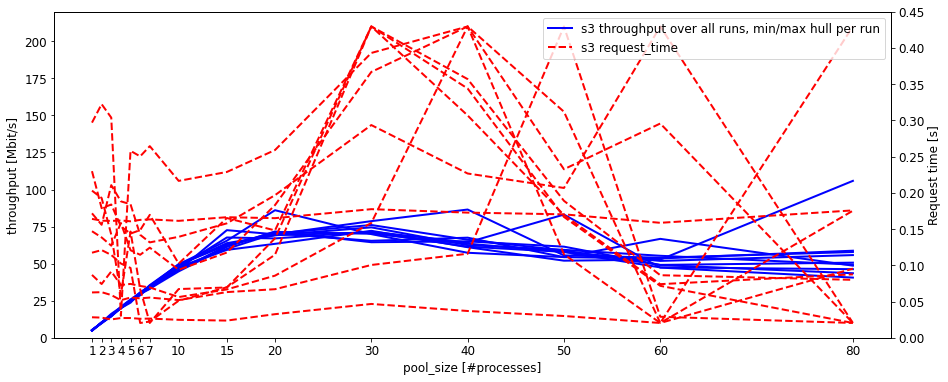

In [7]:
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams.update({'figure.figsize': (15,6)})
thr = plot_throughput_per_storage2(df_datasets, "s3", group_by_dataset, request_time=True)

In [12]:
thr

[{'dataset': 's3',
  'throughput': dataset  pool_size
  s3       1             4.964242
           2            10.402178
           3            16.157597
           4            20.679913
           5            24.749846
           6            29.579614
           7            34.961197
           10           47.517537
           15           59.981042
           20           70.423138
           30           65.435039
           40           67.549602
           50           54.412225
           60           53.539737
           80           58.750850
  Name: throughput [Mbit/s], dtype: float64,
  'median_request_time': dataset  pool_size
  s3       1            0.164050
           2            0.161599
           3            0.161243
           4            0.161941
           5            0.160741
           6            0.162684
           7            0.163356
           10           0.161366
           15           0.166380
           20           0.165056
           30    

In [8]:
df_datasets = []
for i in range(1, 11):
    df_dataset = extract_pandas(output_base_folder, folder_filter=f"run_scr_{i}/*dataset*")
    df_datasets.append(df_dataset)
    print(df_dataset.groupby(group_by_dataset).groups.keys())
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 775/775 [00:01<00:00, 663.10it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 811/811 [00:01<00:00, 680.58it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 764/764 [00:01<00:00, 654.02it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 763/763 [00:01<00:00, 612.73it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 777/777 [00:01<00:00, 623.33it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 803/803 [00:01<00:00, 698.52it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 785/785 [00:01<00:00, 621.02it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 777/777 [00:01<00:00, 620.80it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 780/780 [00:01<00:00, 600.49it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 844/844 [00:01<00:00, 787.97it/s]


dict_keys([('scratch', 1), ('scratch', 2), ('scratch', 3), ('scratch', 4), ('scratch', 5), ('scratch', 6), ('scratch', 7), ('scratch', 10), ('scratch', 15), ('scratch', 20), ('scratch', 30), ('scratch', 40), ('scratch', 50), ('scratch', 60), ('scratch', 80)])


[{'dataset': 'scratch',
  'throughput': dataset  pool_size
  scratch  1            233.174265
           2            304.565406
           3            223.996820
           4            195.949927
           5            168.491660
           6            164.602250
           7            161.066395
           10           158.332614
           15           188.867041
           20           203.117035
           30           140.217969
           40           101.908976
           50            85.632532
           60            80.449833
           80            73.061606
  Name: throughput [Mbit/s], dtype: float64,
  'median_request_time': dataset  pool_size
  scratch  1            0.003116
           2            0.003771
           3            0.007738
           4            0.015489
           5            0.019209
           6            0.023551
           7            0.027232
           10           0.031371
           15           0.013914
           20           0.0032

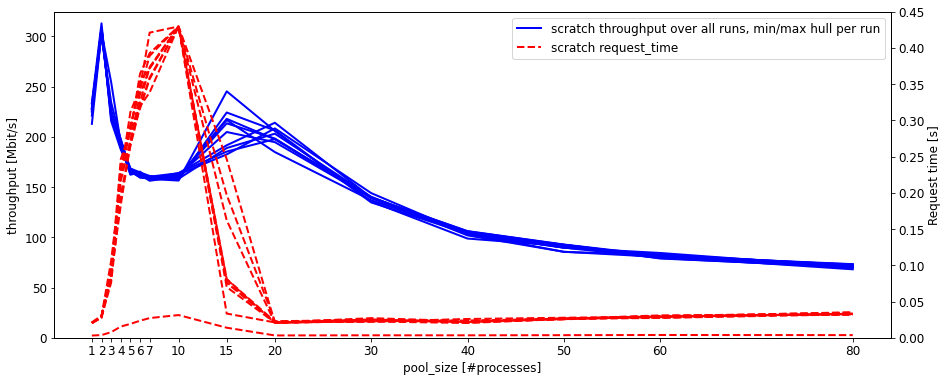

In [9]:
plot_throughput_per_storage2(df_datasets, "scratch", group_by_dataset, request_time=True)